# Introducción a los métodos de Monte Carlo

Un [método de Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method) de puede entender como una [heurística](https://en.wikipedia.org/wiki/Heuristic_(computer_science)), o un método aproximado, basado en probilidad que se utiliza para resolver un problema matemático. No existe un consenso bien marcado entre lo que es y lo que no es un método de Monte Carlo, por lo que hay que ser muy cuidadoso a la hora de utilizar esa palabra.

El nombre "Monte Carlo" viene de que las primeras implementaciones de estos métodos en computadoras digitales se hicieron en el [Laboratorio Nacional de los Álamos](https://en.wikipedia.org/wiki/Los_Alamos_National_Laboratory), uno de los laboratorios científicos más importantes de los mediados del siglo XX, en los que se desarrolla principalmente tecnología militar. Así, el proyecto necesitaba un nombre confidencial para referirse a él. A [Nicholas Metropolis](https://en.wikipedia.org/wiki/Nicholas_Metropolis) se le ocurrió el nombre de Monte Carlo, la capital de Mónaco, una ciudad famosa por sus casinos.

Todos los métodos de Monte Carlo, en algún momento, requieren de utilizar números aleatorios para realizar sus procedimientos. Así, tenemos que definir dos cosas: ¿Qué es un "número aleatorio"? y ¿cómo genero un número aleatorio en la computadora?

## Números aleatorios

Definir un número aleatorio con rigurosidad matemática involucraría adentrarlos a la teoría de la probabilidad desde un punto matemático, lo cuál es imposible de realizar en una clase. 

Así, por ahora simplemente definiremos como un **"número aleatorio"** a un número que puede ser cualquiera de una cantidad finita de valores distintos con distinta probabilidad. Así, un número aleatorio puede ser:

* el resultado de tirar un dado.

* el resultado de tirar una moneda i.e. un volado (Codificando 1="águila", 0= "Sol").

* el número de pasos que camina una persona diario.

* operaciones y funciones aplicadas a números aleatorios.

La computadora es una máquina totalmente **determinista**, es decir, no hay ningun proceso aleatorio que se pueda realizar en la computadora como tirar un dado o hacer un volado. Así, en principio, es **imposible generar números aleatorios** con una computadora.

## Números Pseudoaleatorios

Sin embargo, es posible generar algo muy aproximado a un número aleatorio utilizando una fórmula matemática. Básicamente, vamos recorriendo una lista de números muy grande (i.e. todos los números enteros desde $1$ hasta $2^{64}$) en un orden raro (tan raro que parece aleatorio) pero bien definido, partiendo de un número inicial también bien definido. A este número inicial se le llama **semilla**. 

Dicha semilla normalmente se toma como un parámetro de accesible a la computadora que tiene un grado de aleatoreidad (el número de clicks que se han dado, la temperatura de algún componente, etc.). Eso nos permite generar números "aleatorios" enteros entre $1$ y $2^{64}$. A estos números que parecen aleatorios pero no lo son se les llama **números pseudoaleatorios**. Esos números tiene probabilidad **uniforme**, es decir cualquiera tiene la misma probabilidad.

Ya que difícilmente necesitamos números enteros entre $1$ y $2^{64}$, lo más sensato es dividirlos por $2^{64}$ para obtener números reales entre $2^{-64} ( \approx 0 )$ y $1$. Esto lo podemos aproximar como un **número real aleatorio** en el intervalo $[0,1]$

Por venir de enteros con probabilidades uniformes, estos números reales tendrán una **distribución** uniforme en el intervalo $[0,1]$. Es decir, es igualmente probable encontrarlos en cualquier lugar del intervalo

Podemos aplicarles transformaciones a estos números aleatorios para obtener números con otras distribuciones, como la **distribución normal estándar o gaussiana**, cuya distribución se puede aproximar por:

$$\text{Probabilidad} (x) = \frac{1}{\sqrt{2\pi}} e^{-x^2}$$

## Número aleatorio vs **muestra** de un número aleatorio

Nunca hay que olvidar que, en principio, una número aleatorio es un **posible número que toma un valor dependiendo de una probabilidad**. Si yo quiero obtener alguno de sus valores eso se vuelve una **muestra** de su valor, pero no es "el número aleatorio".

Ejemplificando esto, un volado es un número aleatorio que es $1$ con probabilidad $1/2$ y $0$ con probabilidad $1/2$. Si tiro un volado y obtengo $1$, eso **no un número aleatorio**, es una **muestra** del número aleatorio.

## Preludio computacional: la función `rand` y `randn`

Julia ya tiene una función para generar muestras de números aleatorios con distribución uniforme en el intervalo $[0,1]$ y con distribución normal estándar: las funciones `rand` y `randn`, respectivamente

In [5]:
println(rand())
println(randn())

0.14802507023493527
-0.06720323939664725


Podemos poner dentro de los paréntesis las dimensiones de un arreglo y la función generará, independientemente, un arreglo donde cada entrada es una muestra del número aleatorio con la distribución deseada

In [6]:
# crea un arreglo de 10 muestras de numeros aleatorios uniformes
display(rand(10))
# crea una matriz de 6x5 muestras de números aleatorios normales
display(randn(6,5))

10-element Array{Float64,1}:
 0.9674605788337671
 0.4782700527710875
 0.9232108954835287
 0.5284160710683177
 0.35651901139651154
 0.35903253737862206
 0.29385367795483175
 0.1776494701118836
 0.7086785712211192
 0.47040751946772597

6×5 Array{Float64,2}:
 -0.440856   1.05438   -0.972354   0.0181583   0.887635
  1.73932    0.498506  -0.654967   0.559265    0.397757
  0.286773  -0.61723    0.654275  -0.169945   -1.33893
 -1.53932   -0.924875   0.978167  -0.0862322   1.82507
 -0.633355  -0.101347   1.53141    0.366012   -0.796097
 -2.08159   -0.481605  -2.16222    0.898509    0.662671

## Observando distribuciones: histogramas

Supongamos que tenemos un número aleatorio del que no conocemos su distribución, pero del cual podemos obtener las muestras que queramos . Es posible estimar su distribución utilizando un **histograma**

Si tenemos $k$ muestras de un número aleatorio, con $a$ y $b$ son los valores mínimo y máximo de todas las muestras, respectivamente, entonces el histograma consiste en particionar regularmente $[a,b]$ en $n$ subintervalos de igual longitud y contar la **frecuencia de cada subintervalo**, es decir, cuantas muestras están contenidas en un sub intervalo

Por ejemplo, supongamos que tengo las siguientes muestras

$$
1.1,0.2,0.4,1.0,4,6,3,4.5
$$

Entonces $a = 0.2$, $b=6$ y si tomo $n=2$, entonces divido al intervalo $[a,b]$ en dos: $[0.2,3.1]$ y $[3.1,6]$. El histograma diría que en el intervalo $[0.2,3.1]$ hay $5$ muestras ($1.1,0.2,0.4,1.0,3$), mientras que en el $[3.1,6]$ hay $3$ muestras ($4,6,4.5$)

Obviamente, entre más grande $k$ y más grande es $n$, mejor estimaremos la distribución del número aleatorio con un histograma

En Julia, el paquete Plots tiene una función `histogram` para hacer y graficar histogramas

In [7]:
using Plots

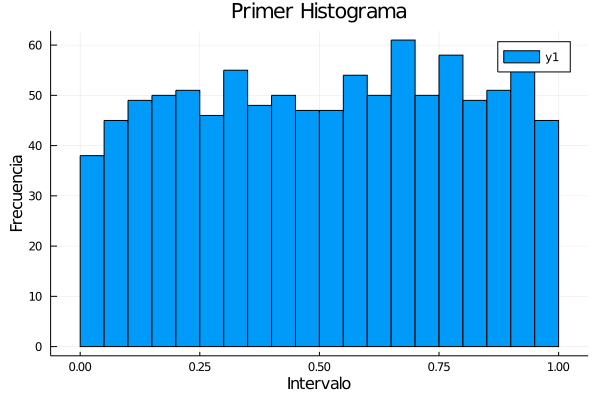

In [14]:
# 1000 muestras de un número aleatorio uniforme
xs1 = rand(1000)
# hago un histograma para n=30
histogram(xs1,nbins=30)
title!("Primer Histograma")
xlabel!("Intervalo")
ylabel!("Frecuencia")

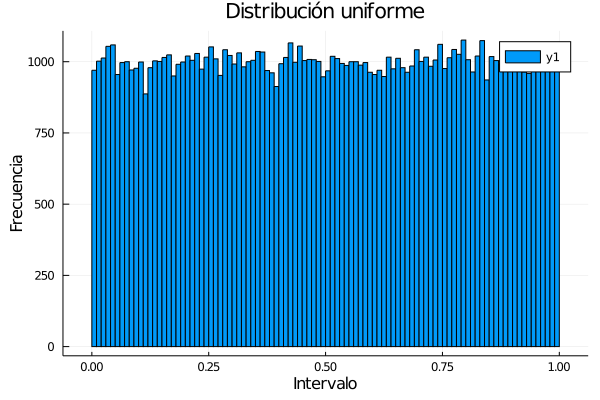

In [20]:
# 100000 muestras de un numero aleatorio uniforme
xs2 = rand(100000)
# hago un histograma para n=100
histogram(xs2,nbins=100)
title!("Distribución uniforme")
xlabel!("Intervalo")
ylabel!("Frecuencia")

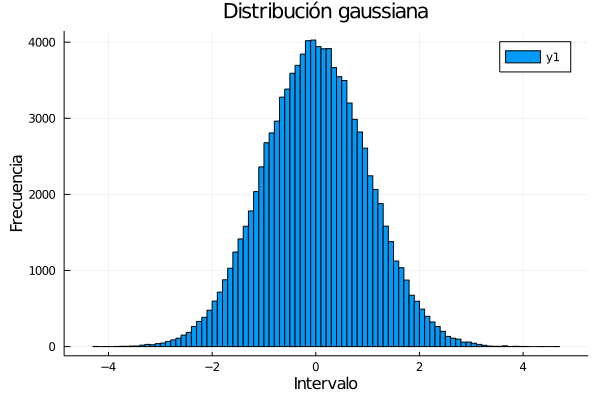

In [23]:
# 100000 muestras de un numero aleatorio gaussiano
xs3 = randn(100000)
# hago un histograma para n=100
histogram(xs3,nbins=100)
title!("Distribución gaussiana")
xlabel!("Intervalo")
ylabel!("Frecuencia")

## Aplicación 1: volados

Podemos usar la función `rand` para obtener un generador de un número aleatorio que sea $0$ con probabilidad $1/2$ y que sea $1$ con probabilidad $1/2$

### Ejercicio 1

Escribe una función `voladoJusto()` que no tome ningún argumento y que utilice la función `rand` para regresar $0$ con probabilidad $1/2$ y $1$ con la misma probabilidad.

**Sugerencia:** ¿como puedes dividir el intervalo $[0,1]$ en dos intervalos para que una muestra de un número uniforme tenga probabilidad igual de estar en cualquiera de los dos? 

### Ejercicio 2

Generaliza tu función del ejercicio anterior a una función `volado(p)` que regrese $0$ con probabilidad $p$ y que regrese $1$ con probabilidad $1-p$. Con $p$ un real en $[0,1]$

### Ejercicio 3

(i) Usa comprensión de areglos para generar $10^5$ volados justos . Realiza un histograma con $n=2$ para verificar que las frecuencias esperadas se cumplen.

(ii) Repite el inciso uno pero para un volado con probabilidad $p=0.25$

## Promedios estadísticos

Si tiramos $k$ volados, podemos ver la frecuencia o la cantidad de volados que cayeron $0$ y la cantidad que cayó $1$. Al dividir estas dos cantidades entre $k$, obtenemos una **estimación** de las probabilidades reales $p$ y $1-p$ de que caigan de cada lado. En principio, **la estimación de las probabilidades nunca va a ser exactactamente igual a la probabilidad real**. Podemos denotar a las estimaciones como $s$ y $1-s$, respectivamente. Conforme $k\to \infty$, el valor $s$ se hace más cercano a $p$.

Una técnica para obtener una buena estimación de $s$ es fijar un valor de $k$ y hacer $m$ estimaciones distintas (en el caso de las probabilidades del volado, esto consiste en tirar $k$ volados $m$ veces distintas), las cuales denotaremos $s_i$, y considerar como estimación final el  **promedio**, definido como

$$
s = \frac{1}{m} \sum_{i=1}^{m} s_i
$$

Con $s_i$ la $i-$ésima estimación

## Ejercicio 4

Define una función `probabilidadEmpiricaVolado(p,k,m)` con `p` un real entre 0 y 1, `k` y `m` enteros positivos.

La función debe de estimar $m$ veces la probabildiad de que un volado con probabilidad $p$ caiga en en $0$ haciendo $k$ tiros con tu función `volado`

Tu función debe de regresar el **promedio** esas $m$ estimaciones.

**Sugerencia:**  la función `sum(A)` regresa la suma de todos los elementos de un arreglo `A`

## Ejercicio 5

Para un valor fijo de $p$, grafica `probabilidadEmpiricaVolado(p,k,m)` como función de $k$ y $m$ utilizando un mapa de calor. ¿Como se comparan los valores con el valor real `p`?

**Sugerencia** no se olviden de que `k` y `m` deben de ser enteros.

## Aplicación 2: dados

Podemos también extender esta idea a la simulación de un dado.

### Ejercicio 6

Escribe una función `dadoJusto()` que no tome ningún argumento y que utilice la función `rand` para regresar $1,2,3,4,5$ o $6$ con probabilidad $1/6$ para cada uno de los valores

**Sugerencia:** ¿como puedes dividir el intervalo $[0,1]$ en dos intervalos para que un número uniforme tenga probabilidad igual de estar en cualquiera de seis intervalos distintos? 

Sin embargo, no es necesario usar algo así: la función  `rand` también puede usarse para elegir un elemento al azar, con probabilidad uniforme, de un objeto iterable

In [41]:
# elige un elemento al azar del rango 1:6
println(rand(1:6))

6


In [47]:
# Genera 100 muestras de un número aleatorio entre 1 y 6
display(rand(1:6,100))

100-element Array{Int64,1}:
 1
 6
 4
 6
 3
 2
 4
 1
 5
 2
 5
 1
 6
 ⋮
 1
 6
 5
 5
 2
 2
 1
 2
 1
 3
 6
 6

## Ejercicio 7

Define una función `probabilidadEmpiricaDado(k,m)` con `k` y `m` enteros positivos.

La función debe de estimar $m$ veces la probabilidad de que un dado caiga en `1` o `5` haciendo $k$ tiradas del dado con su función `dadoJusto` y contando cuantas veces cae `1` o `5`

Su función debe de regresar el promedio de dichas estimaciones.

Grafica la función como función de `m` y `k` en un mapa de calor. ¿Cómo se comparan los valores de la función con el valor real $1/3$?

**Sugerencia:** debes usar un ciclo `for` para contar las veces que cayó 1 o 5

## Aplicación 3: decaimiento radioactivo



Uno de los ejemplos más simples de la existencia de procesos probabilísticos en la naturaleza es el [decaimiento radioactivo](https://en.wikipedia.org/wiki/Radioactive_decay): de forma completamente azarosa, un núcleo atómico puede **decaer**: emitir una partícula y cambiar su número atómico.  

Podemos modelar de manera arcaica el decaimiento radioactivo de la siguiente forma: supongamos que tenemos una cantidad inicial $N_0$ de núcleos radioactivos y que cada uno de ellos tiene una probabilidad $p$ de decaer en un intervalo de tiempo $h$. 

Sea $N(t)$ la cantidad de átomos en el tiempo $t$. Sabemos que $N(0)=N_0$. Notemos que podemos utilizar un ciclo for para imitar el proceso de decaimiento de forma iterativa y obtener $N(0), N(h), N(2h),\ldots, N(k \: h)$

### Ejercicio 8

Escribe una función `radioactivo(N_0,p,k)` que tome como argumento un natural $N_0$, la cantidad de átomos inicial, un real $p \in (0,1)$ la probabilidad de decaer y $k$ un natural que represente el número de tiempos máximo al que conoceremos los átomos. La función debe de regresar un arreglo representando la sucesión $N(0), N(h), N(2h),\ldots, N(k \: h)$

### Ejercicio 9

Utiliza tu función `radioactivo` para simular el decaimiento radioactivo de $N$ nucleos. Haz una figura donde grafiques $m=6$ iteraciones independientes de $N_i(t)$ con el mismo valor de $p$ y de $N_0$. En otra figura, grafica el promedio de $\langle N(t) \rangle$, definido como

$$
\langle N(t) \rangle = \frac{1}{m} \sum_{i=1}^m N_i(t)
$$


### Ejercicio 10

La **vida media** de un elemento radioactivo se define como el tiempo promedio necesario para que, partiendo de $N$ núcleos, al menos $N/2$ núcleos decaigan. Toma un valor fijo y largo de $k$, fija también $p$ y supón que $h=1$. Calcula ahora la vida media para un valor iicial arbitrario $N_0$. Repítelo para distintos valores de p y haz una gráfica de la vida media como función de $p$. ¿Coincide con tu intuición?

## Aplicación 4: Integración

Existe una manera natural de resolver integrales para funciones que están acotadas utilizando generadores de números aleatorios. Sabemos que la integral de una función es el área bajo una curva. Supongamos que dicha area puede acotarse dentro de un rectángulo y supongamos que podemos generar muestras de un punto aleatorio distribuido uniformemente en el rectángulo.

Así, una aproximación al **área bajo la curva curva** será el área del recángulo multiplicada por la fracción de muestras que cayeron dentro del área de bajo la curva

Por ejemplo, para la función

$$
f(x) = \sqrt{1-x^2}
$$

Queremos estimar

$$
\int_{0}^{1} \sqrt{1-x^2} dx
$$

Para $x \in [0,1]$, sabemos que su área bajo la curva está en el rectángulo $[0,1] \times [0,1]$

La generación de puntos aleatorios para ver si están dentro o fuera se puede visualizar como en la siguiente figura:

![imagen](https://lh3.googleusercontent.com/wmGPQ6sNvlS-J1NtTtlctcQAQ5FlggKK6rGglY7SLGECDlyCudXTOvnJYc-0NG0bqQMZBGZCUA-NUgvHtiM09LA3WqWJLuZsdkFwmy18TaS9osbrR25lyswoKeYW9KxZPs5B0VlBXw=w2400)

Siguiendo lo mencionado, el área bajo la curva sería la fracción de puntos azules multiplicada por el área del rectángulo

### Ejercicio 11

Define una función `dentro1(X)`, con `X=[x,y]` un vector de longitud 2, que revisa si el punto $(x,y)$ esta dentro o fuera del área bajo la curva de $f(x) = \sqrt{1-x^2}$. La función regresa $1$ si el punto está dentro del area bajo la curva o $0$ si no lo está.

**Sugerencia**. Solo hay que comparar el valor de $f(x)$ con $y$

### Ejercicio 12

Utiliza la función `dentro1` para definir otra función `area(k)`. com `k` un entero positivo, que genera $k$ puntos uniformemente distribuidos en el rectángulo $[0,1] \times [0,1]$ y los utiliza para calcular el valor del area bajo la curva de la función  $f(x) = \sqrt{1-x^2}$.

**Sugerencia** si $x$ y $y$ están uniformmente distribuidos en $[0,1]$, $(x,y)$ está uniformemente distribuido en $[0,1]\times[0,1]$ 

### Ejercicio 13

Utiliza la función `area` para definir otra función `areaEmpirica(m,k)`. com `m` y `k` enteros positivos, que calcula la función `area(k)` $m$ veces y te regresa el valor promedio. 

Grafica la función en un mapa de calor como función de $m$ y $k$. ¿Como se compara el valor obtenido con el valor real de la integral ($\pi/4$)?